In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("city_locations.txt", names=['City', 'Latitude', 'Longitude'], dtype={'City':str, 'Latitude':float, 'Longitude':float})
data

,City,Latitude,Longitude
0,Buenos Aires,-34.6037,-58.3816
1,Chicago,41.8781,-87.6298
2,Copenhagen,55.6761,12.5683
3,Dublin,53.3498,-6.2603
4,Jakarta,-6.2088,106.8456
5,Los Angeles,34.0522,-118.2437
6,Melbourne,-37.8136,144.9631
7,Mexico City,19.4326,-99.1332
8,Moscow,55.7558,37.6173
9,Mumbai,19.0760,72.8777


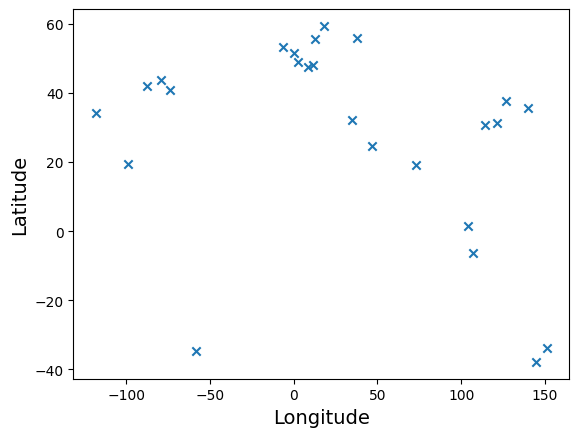

In [4]:
plt.scatter(data["Longitude"], data["Latitude"], marker='x')

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.show()

In [8]:
from torchvision.transforms import ToTensor
import rasterio
#from rasterio.plot import show

In [9]:
# https://datapub.gfz-potsdam.de/download/10.5880.GFZ.1.4.2016.001/
with rasterio.open("World_Atlas_2015.tif") as image:
    image_array = image.read()

In [11]:
torch_image = ToTensor()(image_array)
print(torch_image.shape)

torch.Size([43200, 1, 17406])


In [12]:
imag = torch_image.permute(1, 2, 0).numpy()[0]
imag[8703: 17406, 21600:].min()#.shape

0.0

In [19]:
1/(imag.shape[0] * 1/180), imag.shape[1] * 1/360

(0.010341261633919338, 120.0)

/tmp/ipykernel_642/691440304.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(imag[:int(imag.shape[0]/2), :int(imag.shape[1]/2)]))


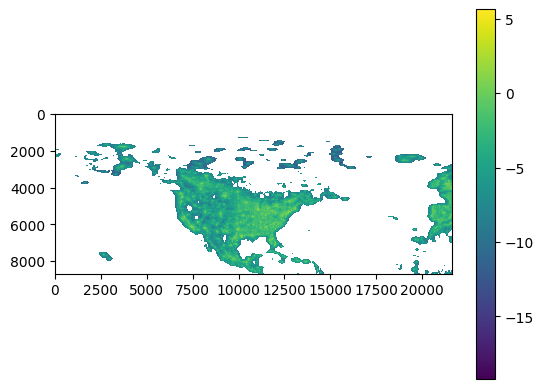

In [13]:
plt.imshow(np.log(imag[:int(imag.shape[0]/2), :int(imag.shape[1]/2)]))
plt.colorbar()

In [45]:
import cv2
cv2_img = cv2.imread("World_Atlas_2015.tif")

[ WARN:0@14.273] global grfmt_tiff.cpp:714 readData OpenCV TIFF: TIFFRGBAImageOK: Sorry, can not handle images with 32-bit samples


In [43]:
show(torch_image)

TypeError: view() received an invalid combination of arguments - got (type), but expected one of:
 * (torch.dtype dtype)
      didn't match because some of the arguments have invalid types: (!type!)
 * (tuple of ints size)
      didn't match because some of the arguments have invalid types: (!type!)


In [26]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 751939200
im = Image.open('World_Atlas_2015.tif')
im.show()

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmppxzxn6co.PNG'


In [24]:
from arcgis.gis import GIS
gis = GIS()
tpk_item = gis.content.add(item_properties={'type': 'Tile Package'}, data='World_Atlas_2015.tpk')
published_item = tpk_item.publish()

TypeError: 'NoneType' object is not subscriptable